<h2> 4 Layer CNN</h2>
<hr>
CORN DATASET
<hr>
About the Dataset:
<br>
<br>Common Rust - 1306 images
<br>Gray Leaf Spot - 574 images
<br>Blight -1146 images
<br>Healthy - 1162 images
<hr>
<br>
Accuracy: 96%
<br>Image augmentation:<br>
Flip vertical , flip horizontal and sharpen


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm


DATADIR = "/content/drive/MyDrive/data"
DATADIR2 = "/content/data_aug"


In [ ]:
import imgaug.augmenters as iaa
from matplotlib import pyplot as plt

from google.colab.patches import cv2_imshow

training_data = []

IMG_SIZE = 80

CATEGORIES = ["Blight","Common_Rust","Gray_Leaf_Spot","Healthy"]


from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

def create_training_data():
    for category in CATEGORIES:  # do
        #knt = 0
        path = os.path.join(DATADIR,category)  # create path to Blight, Common_rust, Gray_Leaf_Spot, Healthy
        class_num = CATEGORIES.index(category)  # get the classification  0=Blight 1=Common_Rust 2=Leaf_Spot 3=Healthy

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                #augmentation of data
                image_new = cv2.imread(os.path.join(path,img))
                #cv2_imshow(image_new)
                if class_num == 2:
                  aug1 = iaa.Sequential([iaa.Fliplr(1)])
                  augmented_image = aug1(image = image_new)
                  new_array_new = cv2.resize(augmented_image, (IMG_SIZE, IMG_SIZE))
                  training_data.append([new_array_new,class_num])
                  aug2 = iaa.Sequential([iaa.Flipud(1)])
                  new_array_new = cv2.resize(augmented_image, (IMG_SIZE, IMG_SIZE))
                  training_data.append([new_array_new,class_num])
                  aug3 = iaa.Sequential([iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5))])
                  new_array_new = cv2.resize(augmented_image, (IMG_SIZE,IMG_SIZE))
                  training_data.append([new_array_new,class_num])
                else:
                  aug1 = iaa.Sequential([iaa.Fliplr(1)])
                  augmented_image = aug1(image = image_new)
                  new_array_new = cv2.resize(augmented_image, (IMG_SIZE, IMG_SIZE))
                  training_data.append([new_array_new,class_num])
                  aug2 = iaa.Sequential([iaa.Flipud(1)])
                  new_array_new = cv2.resize(augmented_image, (IMG_SIZE, IMG_SIZE))
                  training_data.append([new_array_new,class_num])


                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data

            except Exception as e:  # in the interest in keeping the output clean...
                print(e)


create_training_data()

print(len(training_data))

100%|██████████| 1162/1162 [00:07<00:00, 155.88it/s]

13138


In [ ]:
import random

random.shuffle(training_data)

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)


X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

import pickle

pickle_out = open("X_aug.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y_aug.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
X.shape

(13138, 80, 80, 3)

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import pickle



X = pickle.load(open('/content/drive/MyDrive/Dataset/Corn/X_aug.pickle', 'rb'))
y = pickle.load(open('/content/drive/MyDrive/Dataset/Corn/y_aug .pickle', 'rb'))

X = X/255.0

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()

model.add(Conv2D(128, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(4))
model.add(Activation('sigmoid'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.fit(X_train, y_train, batch_size=25, epochs=25)

Epoch 1/25
421/421 [==============================] - 16s 13ms/step - loss: 0.5615 - accuracy: 0.7586
Epoch 2/25
421/421 [==============================] - 6s 13ms/step - loss: 0.3361 - accuracy: 0.8613
Epoch 3/25
421/421 [==============================] - 5s 12ms/step - loss: 0.2997 - accuracy: 0.8781
Epoch 4/25
421/421 [==============================] - 5s 13ms/step - loss: 0.2637 - accuracy: 0.8916
Epoch 5/25
421/421 [==============================] - 5s 13ms/step - loss: 0.2772 - accuracy: 0.8909
Epoch 6/25
421/421 [==============================] - 5s 12ms/step - loss: 0.2412 - accuracy: 0.9058
Epoch 7/25
421/421 [==============================] - 6s 13ms/step - loss: 0.2061 - accuracy: 0.9203
Epoch 8/25
421/421 [==============================] - 5s 13ms/step - loss: 0.1829 - accuracy: 0.9265
Epoch 9/25
421/421 [==============================] - 5s 13ms/step - loss: 0.1528 - accuracy: 0.9422
Epoch 10/25
421/421 [==============================] - 6s 15ms/step - loss: 0.1287 - accur

In [ ]:
# model.save("corn4layercnnaug.h5")

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

30/30 [==============================] - 1s 6ms/step - loss: 0.5768 - accuracy: 0.8216
Test Loss: 0.5767797231674194
Test Accuracy: 0.8216159343719482


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Test set metrics
test_pred = model.predict(X_test)
test_pred = np.argmax(test_pred, axis=1)

test_precision = precision_score(y_test, test_pred, average='macro')
test_recall = recall_score(y_test, test_pred, average='macro')
test_f1_score = f1_score(y_test, test_pred, average='macro')

print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)


30/30 [==============================] - 0s 4ms/step
Test Precision: 0.8493684012066365
Test Recall: 0.8169430807599419
Test F1 Score: 0.8075697787163532


30/30 [==============================] - 0s 4ms/step


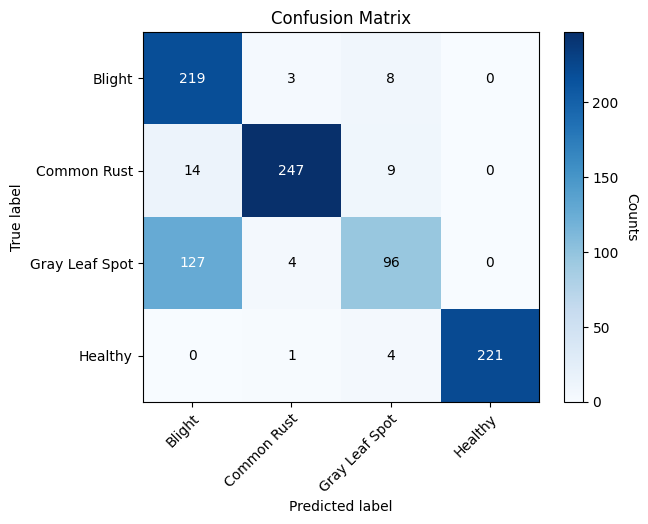

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtain predictions for the test set
test_pred = model.predict(X_test)
test_pred = np.argmax(test_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Create figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix as an image
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Counts', rotation=-90, va="bottom")

# Set axis labels and title
class_names = ['Blight', 'Common Rust', 'Gray Leaf Spot', 'Healthy']  # Replace with your class names
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       xlabel='Predicted label', ylabel='True label',
       title='Confusion Matrix',
       aspect='auto')

# Rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")

# Show the plot
plt.show()
